In [1]:
import numpy as np

In [27]:
class ScratchLinearRegression():
    def __init__(self, num_iter, lr, no_bias, verbose): 
        self.num_iter = num_iter
        self.lr = lr
        self.bias = no_bias
        self.verbose = verbose
        self.theta = np.array([])
        self.loss = np.array([])
        self.val_loss = np.array([])

    # problem6（Learning and estimation ）
    def fit(self, X, y, X_val, y_val):
        """
        Learning linear regression 
        """
        if self.bias == True:
        	bias = np.ones((X.shape[0], 1))
        	X = np.hstack((bias, X))
        	bias = np.ones((X_val.shape[0], 1))
        	X_val = np.hstack((bias, X_val))
        self.theta = np.zeros(X.shape[1])
        self.theta = self.theta.reshape(X.shape[1], 1)
        for i in range(self.num_iter):
            pred = self._linear_hypothesis(X)
            pred_val = self._linear_hypothesis(X_val)
            self._gradient_descent(X, y)
            loss = self._loss_func(pred, y)
            self.loss = np.append(self.loss, loss)
            loss_val = self._loss_func(pred_val, y_val)
            self.val_loss = np.append(self.val_loss, loss_val)
            if self.verbose == True:
                print('{}-th loss {}'.format(i,loss))


    # problem1
    def _linear_hypothesis(self, X):
        """
        Hypothetical functionの出力To計算する
        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
          Training data
        Returns
        -------
        of the following form. ndarray, shape (n_samples, 1)
        線形のHypothetical functionによる推定結果
        """
        pred = X @ self.theta
        return pred

    # problem2
    def _gradient_descent(self, X, y):
        """
        Calculation of updated parameter values using the steepest descent method.
        """
        m = X.shape[0]
        n = X.shape[1]
        pred = self._linear_hypothesis(X)
        for j in range(n):
            gradient = 0
            for i in range(m):
                gradient += (pred[i] - y[i]) * X[i, j]
            self.theta[j] = self.theta[j] - self.lr * (gradient / m)

    # problem3
    def predict(self):
        """
        Estimation by linear regression. 
        """
        if self.bias == True:
            bias = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([bias, X])
        pred_y = self._linear_hypothesis(X)
        return pred_y

    # problem4
    def _mse(self,y_pred, y):
        """
        Calculation of mean square error
        """
        mse = ((y_pred - y) ** 2).sum() / X.shape[0]
        return mse

    # problem5
    def _loss_func(self, y_pred, y):
        """
         loss function
        """
        loss = self._mse(y_pred, y)/2
        return loss

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
dataset = pd.read_csv("../big_data/train.csv")
X = dataset.loc[:, ['GrLivArea', 'YearBuilt']]
y = dataset.loc[:, ['SalePrice']]
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [29]:
slr = ScratchLinearRegression(num_iter=10, lr=0.01, no_bias=True, verbose=True)
slr.fit(X_train, y_train, X_test, y_test)

0-th loss 15595133873.05137
1-th loss 5.551166122854225e+19
2-th loss 2.204324257819331e+29
3-th loss 8.753379356864153e+38
4-th loss 3.475970069322651e+48
5-th loss 1.3803089561646327e+58
6-th loss 5.481211795473231e+67
7-th loss 2.1765911619029966e+77
8-th loss 8.643251278826393e+86
9-th loss 3.432238170241335e+96


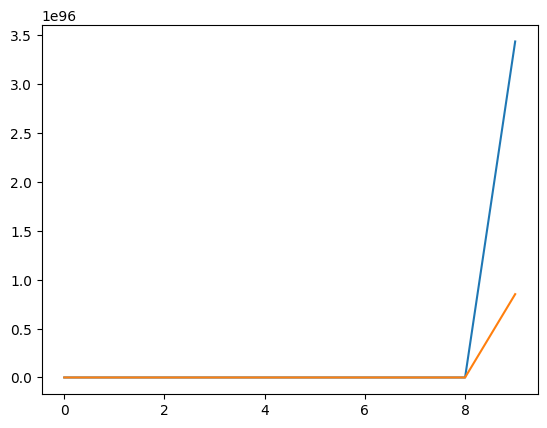

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(slr.loss)
plt.plot(slr.val_loss)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
dataset = pd.read_csv("../big_data/train.csv")
X = dataset.loc[:, ['GrLivArea', 'YearBuilt']]
y = dataset.loc[:, ['SalePrice']]
X = X.values
X = MinMaxScaler().fit_transform(X)
y = np.log(y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)